<a href="https://colab.research.google.com/github/Hrudayangam/iris_dataset/blob/main/iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

from subprocess import check_output

print(check_output(["ls","../archive.zip"]).decode("utf8"))


../archive.zip



In [57]:
iris =  pd.read_csv("/Iris.csv")
iris.head(2) #displays the first two rows of dataset, with the title 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [58]:
iris.info() 
#to check inconsistency in the dataset
#basically checks if there are any null values present in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [59]:
iris.keys() #gives names of the parameters of the dataset

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [60]:
iris.drop('Id',axis=1,inplace = True)  
#dropping the unnecessory columns. mention the name of the axis -here id, then 
# the axis number, starts from 1, and inplace is used to make the official change to the dataset 
# iris.axis(1)

In [61]:
iris.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


##exploratory data analysis with iris

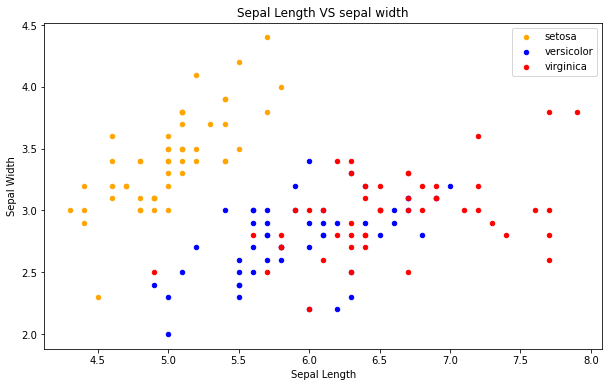

In [62]:
#basicially graphical vivualization of the data
#printing a scatter plot

                                                #sepal length vs sepal width

fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y = 'SepalWidthCm', color='orange', label='setosa')

fig = iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y = 'SepalWidthCm', color='blue', label='versicolor', ax=fig)

fig = iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y = 'SepalWidthCm', color='red', label='virginica', ax=fig)

fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS sepal width")
fig=plt.gcf() #get current fig
fig.set_size_inches(10,6)
plt.show()

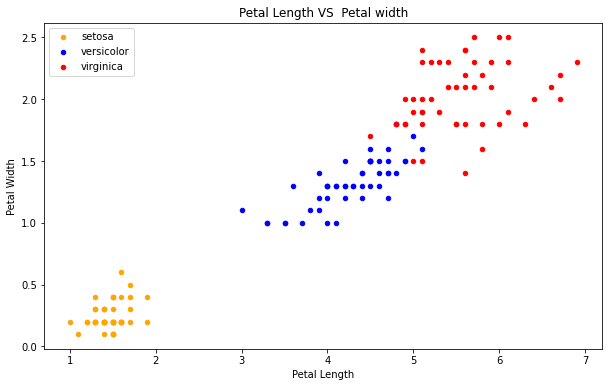

In [63]:
                #  Petal Length VS  Petal width

fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', x='PetalLengthCm', y = 'PetalWidthCm', color='orange', label='setosa')

fig = iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x='PetalLengthCm', y = 'PetalWidthCm', color='blue', label='versicolor', ax=fig)

fig = iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', x='PetalLengthCm', y = 'PetalWidthCm', color='red', label='virginica', ax=fig)

fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title("Petal Length VS  Petal width")
fig=plt.gcf() #get current fig
fig.set_size_inches(10,6)
plt.show()

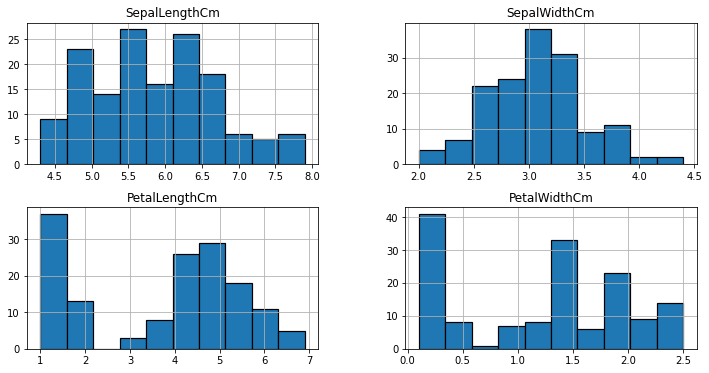

In [64]:
# using historgraph to see how the length and width are distributed

iris.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm 
from sklearn import metrics #checking model accuracy 
from sklearn.tree import DecisionTreeClassifier

In [68]:
iris.shape

(150, 5)

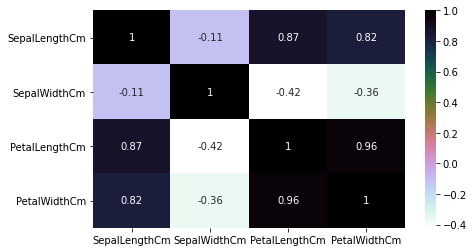

In [74]:
# checking the data for correlation 

plt.figure(figsize=(7,4))
sns.heatmap(iris.corr(), annot=True, cmap= 'cubehelix_r')
#draws a heatmap with input as the correlation of the matrix calculated by the iris.corr()

##Training the data


In [82]:
train, test = train_test_split(iris, test_size=None, train_size = 0.7)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [88]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_y=train.Species
test_X = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_y=test.Species


In [93]:
train_X.head(150)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
6,4.6,3.4,1.4,0.3
41,4.5,2.3,1.3,0.3
119,6.0,2.2,5.0,1.5
16,5.4,3.9,1.3,0.4
5,5.4,3.9,1.7,0.4
...,...,...,...,...
136,6.3,3.4,5.6,2.4
103,6.3,2.9,5.6,1.8
131,7.9,3.8,6.4,2.0
73,6.1,2.8,4.7,1.2


In [96]:
test_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
115,6.4,3.2,5.3,2.3
52,6.9,3.1,4.9,1.5
23,5.1,3.3,1.7,0.5
142,5.8,2.7,5.1,1.9
47,4.6,3.2,1.4,0.2


In [97]:
test_y.head()


115     Iris-virginica
52     Iris-versicolor
23         Iris-setosa
142     Iris-virginica
47         Iris-setosa
Name: Species, dtype: object

##SUPPORT VECTOR MACHINE SVM


In [98]:
model = svm.SVC() #selecting the algo, naming it as our model


model.fit(train_X, train_y) #training the algo with the training data - x and the training output - y
#  here the algo is trained by the above statement

prediction = model.predict(test_X) #passing the testing data to the trained algo 

print('the accuracy of the SVM model is :', metrics.accuracy_score(prediction,test_y))
#checking the accuracy of the algo 


the accuracy of the SVM model is : 0.9333333333333333


In [99]:
test_y.head()

115     Iris-virginica
52     Iris-versicolor
23         Iris-setosa
142     Iris-virginica
47         Iris-setosa
Name: Species, dtype: object

##Decision Tree

In [100]:
model = DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('the accuracy of the decision tree model is :', metrics.accuracy_score(prediction,test_y))

the accuracy of the decision tree model is : 0.9777777777777777


## K-nearest Neighbours

In [108]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('the accuracy of the KNN model is :', metrics.accuracy_score(prediction,test_y))

the accuracy of the KNN model is : 0.9777777777777777


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


([<matplotlib.axis.XTick at 0x7fdfd307cf10>,
 <a list of 10 Text major ticklabel objects>)

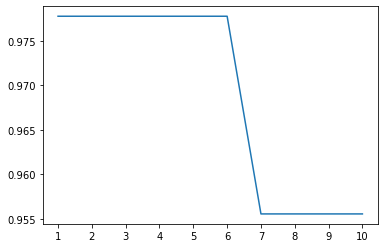

In [109]:
a_index = list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]

for i in list(range(1,11)):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(train_X,train_y)
  prediction=model.predict(test_X)
  a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))


plt.plot(a_index,a)
plt.xticks(x) #get the location of the tick at that state, in the loop 

##splitting the data into petal length and sepal

In [114]:
petal = iris[['PetalLengthCm','PetalWidthCm','Species']]
sepal = iris[['','Species']]



In [118]:
train_p, test_p = train_test_split(petal, test_size=0.3, random_state=0)

train_x_p= train_p[['PetalLengthCm','PetalWidthCm']]
train_y_p= train_p.Species

test_x_p= test_p[['PetalLengthCm','PetalWidthCm']]
test_y_p= test_p.Species



In [117]:
train_s, test_s = train_test_split(sepal, test_size=0.3, random_state=0)

train_x_s= train_s[['SepalLengthCm','SepalWidthCm']]
train_y_s= train_s.Species

test_x_s= test_s[['SepalLengthCm','SepalWidthCm']]
test_y_s= test_s.Species


In [121]:
model = svm.SVC()

model.fit(train_x_p,train_y_p)
prediction = model.predict(test_x_p)
print("accuracy of SVM using Petal is ", metrics.accuracy_score(prediction,test_y_p))

model = svm.SVC()

model.fit(train_x_s,train_y_s)
prediction = model.predict(test_x_s)
print("accuracy of SVM using Sepal is ", metrics.accuracy_score(prediction,test_y_s))

accuracy of SVM using Petal is  0.9777777777777777
accuracy of SVM using Sepal is  0.8


In [122]:
#this shows that the petals data is more correlated and better to use as seen by the heatmap
#this is why we use the heatmap to check the correlation using the iris.corr 